# reinforcement learning

### Optimization in reinforcement Learning

In [1]:
from pybrain.rl.environments.cartpole.balancetask import BalanceTask
task = BalanceTask()

In [3]:
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(task.outdim, 3, task.indim)

In [4]:
from pybrain.rl.agents import OptimizationAgent
from pybrain.rl.experiments import EpisodicExperiment
from pybrain.optimization import HillClimber
agent = OptimizationAgent(net, HillClimber())
exp = EpisodicExperiment(task, agent)
exp.doEpisodes(100)

In [16]:
from pybrain.rl.learners import ENAC
from pybrain.rl.agents import LearningAgent
agent = LearningAgent(net, ENAC())
exp = EpisodicExperiment(task, agent)
exp.doEpisodes(10)

[[-1, -1, -1, -1, -1, -1, -1, -1984],
 [-1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1976],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1982],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1980],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1968],
 [-1, -1, -1, -1, -1, -1988],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1978],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1982],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1978],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1976]]

## Reinforcement learning
官网的example, from Pybrain v0.3 [documentation](http://pybrain.org/docs/tutorial/reinforcement-learning.html)

**Note: You can directly run the code in this tutorial by running the script docs/tutorials/rl.py.**

In [29]:
%clear
%reset
from scipy import *
import sys, time 

from pybrain.rl.environments.mazes import Maze,MDPMazeTask
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q, SARSA
from pybrain.rl.experiments import Experiment
from pybrain.rl.environments import Task


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


"""
A reinforcement learning (RL) task in pybrain always consists of a few
components that interact with each other: Environment, Agent, Task, and
Experiment. In this tutorial we will go through each of them, create
the instances and explain what they do.

But first of all, we need to import some general packages and the RL
components from PyBrain:
"""

In [30]:
import pylab 
pylab.gray()
pylab.ion()
%matplotlib inline
#%pylab inline

For later visualization purposes, we also need to initialize the
plotting engine.

The Environment is the world, in which the agent acts. It receives input
with the** .performAction()** method and returns an output with
**.getSensors().** All environments in PyBrain are located under
*pybrain/rl/environments.*

One of these environments is the maze environment, which we will use for
this tutorial. It creates a labyrinth with free fields, walls, and an
goal point. An agent can move over the free fields and needs to find the
goal point. Let's define the maze structure, a simple 2D numpy array, where
1 is a wall and 0 is a free field:

In [31]:
structure = array( [[1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 0, 0, 1, 0, 0, 0, 0, 1],
                    [1, 0, 0, 1, 0, 0, 1, 0, 1],
                    [1, 0, 0, 1, 0, 0, 1, 0, 1],
                    [1, 0, 0, 1, 0, 1, 1, 0, 1],
                    [1, 0, 0, 0, 0, 0, 1, 0, 1],
                    [1, 1, 1, 1, 1, 1, 1, 0, 1],
                    [1, 0, 0, 0, 0, 0, 0, 0, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1]])

  goal:
  
  (n,0),(n,1),(n,2),...(n,n)
  
  ...
  
  ...
  
  (0,0),(0,1),(0,2),...(0,n)
  

In [32]:
environmet = Maze(structure, (1,1)) #(1.1) goal position

In [33]:
print environmet

#########
#@      #
####### #
#     # #
#  # ## #
#  #  # #
#  #  # #
#* #    #
#########



In [42]:
environmet??

In [34]:
controller = ActionValueTable(81,4)
controller.initialize(1.)
#print controller

In [120]:
# controller.params

In [35]:
learner = Q()
agent = LearningAgent(controller, learner)

In [69]:
agent??

In [27]:
Q??

In [70]:
learner??

In [36]:
task = MDPMazeTask(environmet)

In [66]:
task??

In [37]:
experiment = Experiment(task, agent)

In [68]:
experiment??

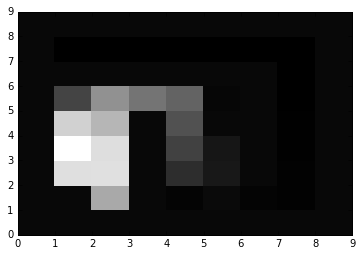

In [38]:
for i in range(100):
    experiment.doInteractions(100)
    agent.learn()
    agent.reset()
    
pylab.pcolor(controller.params.reshape(81, 4).max(1).reshape(9,9))
pylab.draw()

In [12]:
pylab.pcolor?

In [139]:
a= array([[1,2,3],
        [4,5,6],
        [7,8,9],
        [10,11,12]])
print a
b= a.max(1)  # 0,按列取最大；  1， 按行取最大
print b

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 3  6  9 12]


In [27]:
#!/usr/bin/python
"""
import matplotlib.pyplot as plt
class QBinaryTree(object):
    def __init__(self):
        self.right = None
        self.left = None
        self.parent = None
        self.reward = 0
        self.value = None
        self.depth = None
        self.Qval = 0
        self.Gdata = []
    def setLeft(self, node):
        self.left = node
        self.left.value = "Discharge"
    def setRight(self, node):
        self.right = node
        self.right.value = "Charge"
    def setParent(self, node):
        self.parent = node
    def getParent(self):
        return self.parent
    def getLeft(self):
        return self.left
    def getRight(self):
        return self.right
    def getTReward(self, Pwt, Dt, Rtc, Rtd, k, gamma):
        if self.getDepth() == 3:

            temp = self
            reward = 0
                while temp.getParent():
                    n = temp.getDepth()
                    n -= 1
                    if temp.value == "Charge":
                        reward += gamma ** (n) * k * (Pwt[n] - Rtc)

                    if temp.value == "Discharge":
                        reward += gamma ** (n) * (Pwt[n] / Dt[n]) * (Dt[n] - Rtd)

                    temp = temp.getParent()
                return reward
        else:
            print("Not to be used for this purpose")
 
  def getDepth(self):
        cnt = 0
        temp = self
        while temp.getParent():
            cnt += 1
            temp = temp.getParent()

        return cnt
 
    def __str__(self):
        stringer = []
        tempstring = ""
        temp = self
        while temp.getParent():
            stringer.append(temp.value)
            temp = temp.getParent()
        stringer.reverse()
        for i in range(len(stringer)):
            tempstring += stringer[i] + ">>"
        return tempstring
 
    def DepnBtree(number):
        """Construct a binary tree of depth n for forseeing a depth of n"""
        number = 2 ** (number + 1) - 1
        root = QBinaryTree()
        queue = [root]
        counter = 1
        status = True
        while status:
            if len(queue) > 0 and counter != number:
                temp = queue.pop(0)
                temp.setLeft(QBinaryTree())
                temp.setRight(QBinaryTree())
                temp.getLeft().setParent(temp)
                temp.getRight().setParent(temp)
                queue.append(temp.getRight())
                queue.append(temp.getLeft())
                counter += 2

            else:
                status = False
        return root
 
  def QvalTable(root, Pwt, Dt, Rtd, Rtc, k, gamma, alpha):
        stack = [root]
        while len(stack) != 0:
            temp = stack.pop()

            if temp.getDepth() == 3:
                RF = temp.getTReward(Pwt, Dt, Rtd, Rtc, k, gamma)
                temp.Qval += alpha * (RF - temp.Qval)

                if len(temp.Gdata) == 0:
                    temp.Gdata.append(temp.Qval)
                elif int(temp.Qval) == int(temp.Gdata[len(temp.Gdata) - 1]):
                    print("Optimal Qval for sequence:" + str(temp) + "is")
                    print(temp.Gdata)
                    plt.show(temp.Gdata)
                    plt.show()

                #a="Optimal Qval for sequence:"+str(temp)+"is"
                #b=temp.Gdata
                #for
                #dic.keys()
                #if len(dic)==8:
                #    for i in dic.keys()
                #        print i,dic[i]
                else:
                    temp.Gdata.append(temp.Qval)
            if temp.getRight():
                stack.append(temp.getRight())
            if temp.getLeft():
                stack.append(temp.getLeft())

"""

SyntaxError: invalid syntax (<ipython-input-27-9368aec6d5fc>, line 69)

In [ ]:
P = [6000.0, 4800.0, 4800.0]
D = [2800.0, 2800.0, 2800.0]
k = 1
g = 0.8
Rd = 1000
Rc = 1000
al = 0.8
d = input("Please Enter Depth of Prediction:")
mnode = DepnBtree(d)
d = input("Enter the number of iterations:")
for i in range(int(d)):
    QvalTable(mnode, P, D, Rd, Rc, k, g, al

### Q learning
##### PyBrain : reinforcement learning,a tutorial 
using Q value Table

source from [simon's technical blog](http://simontechblog.blogspot.com/2010/08/pybrain-reinforcement-learning-tutorial_21.html?showComment=1460952050532#c8338267566814532718)

path : F:\Anaconda2\Lib\site-packages\pybrain\rl\environments

dependencies：
- *blackjackenv.py*
- *blackjacktask.py*
>即以下两个

In [ ]:
from pybrain.rl.environments.environment import Environment
from scipy import zeros

class BlackjackEnv(Environment):
    """ A (terribly simplified) Blackjack game implementation of an environment. """       

    # the number of action values the environment accepts
    indim = 2
    
    # the number of sensor values the environment produces
    outdim = 21
    
    def getSensors(self):
        """ the currently visible state of the world (the    observation may be stochastic - repeated calls returning different values) 
            :rtype: by default, this is assumed to be a numpy array of doubles
        """
        hand_value = int(raw_input("Enter hand value: ")) - 1
        return [float(hand_value),]
                    
    def performAction(self, action):
        """ perform an action on the world that changes it's internal state (maybe stochastically).
            :key action: an action that should be executed in the Environment. 
            :type action: by default, this is assumed to be a numpy array of doubles
        """
        print "Action performed: ", action

    def reset(self):
        """ Most environments will implement this optional method that allows for reinitialization. 
        """

In [ ]:
from scipy import clip, asarray

from pybrain.rl.environments.task import Task
from numpy import *

class BlackjackTask(Task):
    """ A task is associating a purpose with an environment. It decides how to evaluate the observations, potentially returning 
        reinforcement rewards or fitness values. 
    Furthermore it is a filter for what should be visible to the agent.
    Also, it can potentially act as a filter on how actions are transmitted to the environment. """

    def __init__(self, environment):
        """ All tasks are coupled to an environment. """
        self.env = environment
        # we will store the last reward given, remember that "r" in the Q learning formula is the one from the last interaction,
        #    not the one given for the current interaction!
        self.lastreward = 0

    def performAction(self, action):
        """ A filtered mapping towards performAction of the underlying environment. """                
        self.env.performAction(action)
        
    def getObservation(self):
        """ A filtered mapping to getSample of the underlying environment. """
        sensors = self.env.getSensors()
        return sensors
    
    def getReward(self):
        """ Compute and return the current reward (i.e. corresponding to the last action performed) """
        reward = raw_input("Enter reward: ")
        
        # retrieve last reward, and save current given reward
        cur_reward = self.lastreward
        self.lastreward = reward
    
        return cur_reward

    @property
    def indim(self):
        return self.env.indim
    
    @property
    def outdim(self):
        return self.env.outdim

In [9]:
from pybrain.rl.environments.blackjacktask import BlackjackTask
from pybrain.rl.environments.blackjackenv import BlackjackEnv
#above ,we should implemented it ourself 

from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q
from pybrain.rl.experiments import Experiment
from pybrain.rl.explorers import EpsilonGreedyExplorer

In [12]:
# define action-value table
# number of states is:
#
#    current value: 1-21
#
# number of actions:
#
#    Stand=0, Hit=1
av_table = ActionValueTable(21, 2)
av_table.initialize(0.)

In [20]:
# print av_table
# av_table??

In [21]:
# define Q-learning agent
learner = Q(0.5, 0.0)
learner._setExplorer(EpsilonGreedyExplorer(0.0))
agent = LearningAgent(av_table, learner)


In [22]:
# print learner

In [23]:
# define the environment
env = BlackjackEnv()

# define the task
task = BlackjackTask(env)

# finally, define experiment
experiment = Experiment(task, agent)

In [25]:
experiment??

In [ ]:
# ready to go, start the process
#while True:
for i in range(300):
    experiment.doInteractions(1)
    agent.learn()
    agent.reset()